<a href="https://colab.research.google.com/github/beesaprathyusha20/Deep-Learning/blob/main/Keras_Basics(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Installing Keras
!pip install -q keras

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.utils import plot_model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                144       
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


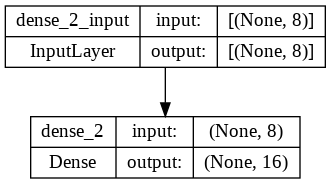

In [8]:
#Intializing the ANN
model = Sequential()
model.add(Dense(16,input_shape=(8,)))
model.summary()
plot_model(model,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [9]:
model.get_config() #get the details of the model

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_2_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 16,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [11]:
model.get_weights() #display the model weightss

[array([[-0.26475823,  0.25613034, -0.32725596, -0.26024985,  0.20442069,
          0.41244936, -0.28386307, -0.31706333, -0.14251363,  0.36677098,
          0.21876204,  0.12669909,  0.4712075 ,  0.00544953, -0.48908997,
          0.36040413],
        [-0.10360372,  0.20164478, -0.22776961,  0.04781783,  0.49771702,
         -0.41020477, -0.2645223 ,  0.33029914, -0.30050588, -0.03915739,
         -0.26475036, -0.2446053 , -0.32865274, -0.04285479, -0.41278446,
         -0.10096014],
        [ 0.42473078, -0.32341003, -0.29313517,  0.4820304 , -0.15071988,
         -0.17008805,  0.15433598,  0.05323982, -0.25204265, -0.25503457,
         -0.25013363,  0.48309648, -0.18024874, -0.15397167, -0.17565286,
          0.1931026 ],
        [-0.2405597 ,  0.47045648, -0.1473949 , -0.10243404, -0.3818388 ,
         -0.4486282 ,  0.43878067, -0.15095079,  0.4031347 , -0.18139148,
          0.00692284,  0.15261924,  0.10169804,  0.13338292, -0.26053393,
          0.40176547],
        [ 0.08392119

In [12]:
from keras.layers import Dropout,Dense

Drop out layers is used to treat the overfitting case

In [13]:
model = Sequential()
model.add(Dense(16,input_shape=(8,)))
model.add(Dropout(.2))
model.add(Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 314
Trainable params: 314
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.layers import Dense,Flatten

Flatten layer is used the flatten the input data
used when we get the multi-dimensional output from the previous layer and want to make it linear to pass it to the dense layer

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8, 16)             48        
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,338
Trainable params: 1,338
Non-trainable params: 0
_________________________________________________________________


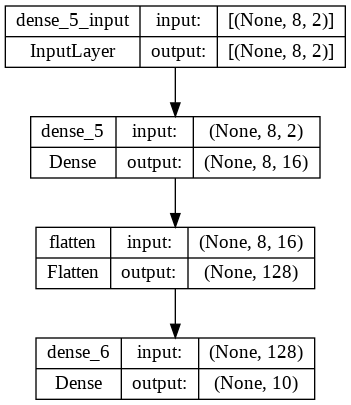

In [16]:
model = Sequential()
model.add(Dense(16,input_shape=(8,2)))
model.add(Flatten())
model.add(Dense(10))
model.summary()
plot_model(model,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [18]:
from tensorflow.keras.layers import Dense,Permute
import tensorflow

Permute layer which is used to change the shape of the input of the specific pattern

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8, 16)             48        
                                                                 
 permute (Permute)           (None, 16, 8)             0         
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


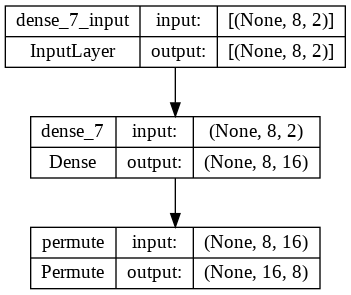

In [21]:
model = Sequential()
initializer = tensorflow.keras.initializers.GlorotUniform()
model.add(Dense(16,input_shape=(8,2),kernel_initializer=initializer))
model.add(Permute((2,1)))
model.summary()
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

Initializers are used for the dense layer where we need to initialize the weight vector and bias vector

In [23]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Constant
import numpy as np


In [24]:
initializers = ['zeros','ones',Constant(value=5),'RandomNormal','RandomUniform','TruncatedNormal','VarianceScaling','glorot_normal','glorot_uniform','he_normal','he_uniform']

In [25]:
np.random.seed(1)
for init in initializers:
  print("Initializer=",init)
  model = Sequential([Dense(5,input_dim=2,kernel_initializer=init)])
  for layer in model.layers:
    weights = layer.get_weights()
    print(weights)
    print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

Initializer= zeros
[array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Initializer= ones
[array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Initializer= <keras.initializers.initializers_v2.Constant object at 0x7f0320478690>
[array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Initializer= RandomNormal
[array([[ 0.00677203, -0.05171717,  0.04247489, -0.00681116, -0.06226427],
       [-0.01864475,  0.00589372, -0.01361862, -0.15324673, -0.00887682]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""

In the above case we didn't initialized the bias, Therefore the bias vector will always be zero

In [26]:
#Installing Keras
!pip install -q keras

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.utils import plot_model


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                144       
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


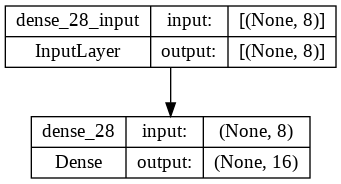

In [55]:
#Initializing the ANN
model = Sequential()
model.add(Dense(16,input_shape=(8,)))
model.summary() #it gives the structure of the output
plot_model(model,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [56]:
model.get_config() #get the details of the model

{'name': 'sequential_30',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_28_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_28',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 16,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [57]:

model.get_weights() #get the model weights

[array([[-0.325297  ,  0.3610251 ,  0.37834954, -0.36938262,  0.45399356,
         -0.27161598, -0.12067366,  0.03883076,  0.05626976, -0.13389492,
          0.17737985,  0.07009363, -0.10763943, -0.08776665,  0.2676034 ,
         -0.16312587],
        [-0.14480627,  0.27178836,  0.2511152 , -0.15548468, -0.28693044,
         -0.21780837,  0.2396183 , -0.41628718,  0.27379596,  0.26734376,
         -0.3061297 , -0.34256196, -0.14255333,  0.24337816, -0.19526899,
         -0.1884849 ],
        [-0.1992662 ,  0.0523994 , -0.21622682, -0.44456577, -0.03013802,
          0.31734204,  0.20420969, -0.46507275,  0.33614445, -0.35900855,
         -0.16555905, -0.33741093, -0.32288766,  0.07297373, -0.075284  ,
          0.38072217],
        [-0.3316462 ,  0.45019555, -0.3015169 , -0.0447495 ,  0.49659657,
          0.05278087, -0.16745985,  0.20552003, -0.26997423,  0.3217579 ,
         -0.29885244, -0.11072218,  0.02322853, -0.17101777, -0.44648564,
          0.2894318 ],
        [ 0.3257612 

In [58]:
from keras.layers import Dense,Dropout

In [59]:
model = Sequential()
model.add(Dense(16,input_shape=(8,)))
model.add(Dropout(.2))
model.add(Dense(10))
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 16)                144       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_30 (Dense)            (None, 10)                170       
                                                                 
Total params: 314
Trainable params: 314
Non-trainable params: 0
_________________________________________________________________


In [60]:
from tensorflow.keras.layers import Dense,Flatten

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 8, 16)             48        
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,338
Trainable params: 1,338
Non-trainable params: 0
_________________________________________________________________


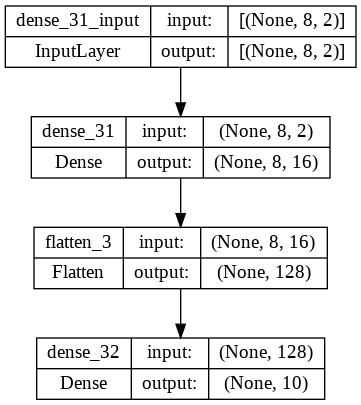

In [61]:
model = Sequential()
model.add(Dense(16,input_shape=(8,2)))
model.add(Flatten())
model.add(Dense(10))
model.summary()
plot_model(model,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [62]:
from tensorflow.keras.layers import Dense,Permute
import tensorflow

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 8, 16)             48        
                                                                 
 permute_4 (Permute)         (None, 16, 8)             0         
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


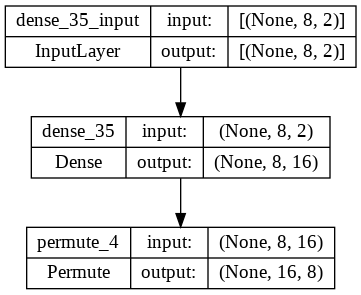

In [76]:
model = Sequential()
initializer = tensorflow.keras.initializers.GlorotUniform()
model.add(Dense(16,input_shape=(8,2),kernel_initializer=initializer))
model.add(Permute((2,1)))
model.summary()
plot_model(model,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [77]:
from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Constant
import numpy as np

In [83]:
initializers = ['zeros','ones',Constant(value=5),'RandomUniform','RandomNormal','TruncatedNormal','VarianceScaling','glorot_uniform','glorot_normal','he_uniform','he_normal']

In [84]:
np.random.seed(1)
for init in initializers:
  print("Initializer=",init)
  model = Sequential([Dense(5,input_dim=2,kernel_initializer=init)])
  for layer in model.layers:
    weights = layer.get_weights()
    print(weights)
  print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

Initializer= zeros
[array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Initializer= ones
[array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Initializer= <keras.initializers.initializers_v2.Constant object at 0x7f0320040a50>
[array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Initializer= RandomUniform
[array([[ 0.0166722 , -0.03958526, -0.00368357,  0.04004279,  0.04602602],
       [ 0.04557078,  0.00971186, -0.04922071, -0.01957798, -0.03195797]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
""""""""""""""""""""""""""""""""""""""""""